In [176]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')
import seaborn as sns
import time
import random
from sklearn import metrics
%matplotlib inline

In [177]:
url1 = 'https://archive.ics.uci.edu/ml/machine-learning-databases/spect/SPECTF.train'
url2 = 'https://archive.ics.uci.edu/ml/machine-learning-databases/spect/SPECTF.test'
col_names = ['target', 'F1R', 'F1S', 'F2R', 'F2S', 'F3R', 'F3S', 'F4R', 'F4S', 'F5R','F5S','F6R','F6S','F7R','F7S','F8R','F8S','F9R','F9S','F10R',
    'F10S',  'F11R','F11S','F12R','F12S','F13R','F13S','F14R','F14S','F15R','F15S','F16R','F16S','F17R','F17S','F18R','F18S','F19R','F19S',   'F20R',
    'F20S','F21R','F21S','F22R','F22S']
spectf= pd.read_table(url1,sep=',',names=col_names).append(pd.read_table(url2,sep=',',names=col_names))

In [178]:
#check the head of the data
spectf.head()

,target,F1R,F1S,F2R,F2S,F3R,F3S,F4R,F4S,F5R,...,F18R,F18S,F19R,F19S,F20R,F20S,F21R,F21S,F22R,F22S
0,1,59,52,70,67,73,66,72,61,58,...,66,56,62,56,72,62,74,74,64,67
1,1,72,62,69,67,78,82,74,65,69,...,65,71,63,60,69,73,67,71,56,58
2,1,71,62,70,64,67,64,79,65,70,...,73,70,66,65,64,55,61,41,51,46
3,1,69,71,70,78,61,63,67,65,59,...,61,61,66,65,72,73,68,68,59,63
4,1,70,66,61,66,61,58,69,69,72,...,67,69,70,66,70,64,60,55,49,41


In [179]:
spectf.shape

(267, 45)

Text(0.5,1,'Correlation between different features')

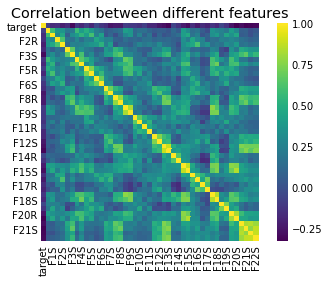

In [180]:
#check the correlation between the variables
correlation = spectf.corr()
sns.heatmap(correlation, vmax=1, square=True,cmap='viridis')
plt.title('Correlation between different features')

In [181]:
# store target variable in target variable and drop it from the spectf dataframe
target=spectf['target']
spectf.drop('target',axis=1,inplace=True)

In [182]:
spectf.head()

,F1R,F1S,F2R,F2S,F3R,F3S,F4R,F4S,F5R,F5S,...,F18R,F18S,F19R,F19S,F20R,F20S,F21R,F21S,F22R,F22S
0,59,52,70,67,73,66,72,61,58,52,...,66,56,62,56,72,62,74,74,64,67
1,72,62,69,67,78,82,74,65,69,63,...,65,71,63,60,69,73,67,71,56,58
2,71,62,70,64,67,64,79,65,70,69,...,73,70,66,65,64,55,61,41,51,46
3,69,71,70,78,61,63,67,65,59,59,...,61,61,66,65,72,73,68,68,59,63
4,70,66,61,66,61,58,69,69,72,68,...,67,69,70,66,70,64,60,55,49,41


In [183]:
target.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [184]:
X_train, X_test, y_train, y_test = train_test_split(spectf, target, random_state=123)

In [185]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_std = scaler.fit_transform(X_train)

Text(20,0.95,'20')

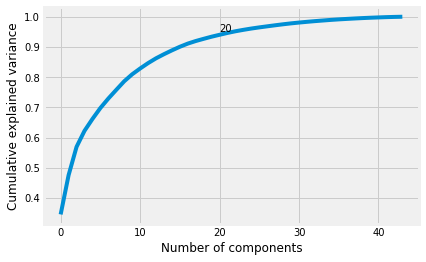

In [186]:
# apply PCA
from sklearn.decomposition import PCA
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.annotate('20',xy=(20, .95))

Text(0.5,1,'Correlation between different features')

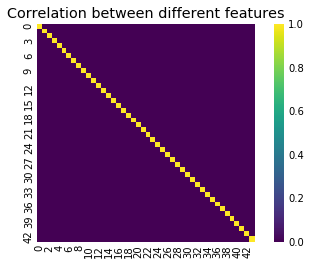

In [187]:
#correlation between the variables after transforming the data with PCA is 0
correlation = pd.DataFrame(PCA().fit_transform(X_std)).corr()
sns.heatmap(correlation, vmax=1, square=True,cmap='viridis')
plt.title('Correlation between different features')

In [188]:
#consider first 20 components as they are explaining the 95% of variation in the data
x_pca = PCA(n_components=20)
spectf_pca = x_pca.fit_transform(X_std)

Text(0.5,1,'Correlation between different features')

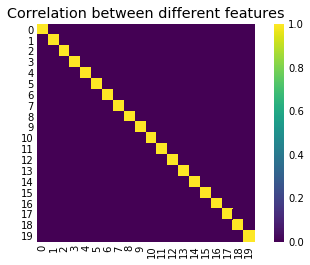

In [189]:
#correlation between the variables after transforming the data with PCA is 0
correlation = pd.DataFrame(PCA(n_components=20).fit_transform(X_std)).corr()
sns.heatmap(correlation, vmax=1, square=True,cmap='viridis')
plt.title('Correlation between different features')

In [190]:
rfClassifier=RandomForestClassifier(max_depth = 8, min_samples_split=3, n_estimators = 25, random_state = 1)
start=time.time()
rfClassifier.fit(spectf_pca,y_train)
end=time.time()
training_time_after_pca =end - start
print("Time taken to train the model with 20 components is {}.".format(training_time_after_pca))

Time taken to train the model with 20 components is 0.08520317077636719.


In [191]:
rfClassifier.score(spectf_pca,y_train)

1.0

In [192]:
pd.crosstab(target,1)

col_0,1
target,
0,55
1,212


In [193]:
# Now test the model
spectf_pca_test = x_pca.fit_transform(X_test)
test_pred = rfClassifier.predict(spectf_pca_test)
df_confusion = metrics.precision_recall_fscore_support(y_test, test_pred,average='weighted')
df_confusion

(0.8173418621179814, 0.8507462686567164, 0.8224946695095949, None)

In [194]:
a=test_pred

In [195]:
b=y_test

In [196]:
result=pd.DataFrame(a,b)

In [197]:
print(metrics.accuracy_score(a,b))
print(result)

0.8507462686567164
        0
target   
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
0       0
1       1
0       1
1       1
1       1
1       1
1       1
0       1
1       0
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
0       0
1       1
1       1
0       1
...    ..
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
0       1
1       1
1       1
1       1
1       1
1       1
1       0
1       1
1       1
1       1
1       1
1       1
1       1
0       1
1       1
1       1
1       1
1       1
0       1
1       1
1       1

[67 rows x 1 columns]
